In [1]:
#importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#lendo os arquivos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
traindf = train[['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]


traindf = traindf[traindf['NU_NOTA_MT'].notna()]

In [4]:
#o que tem nas colunas
traindf.columns

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024',
       'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [5]:
corr_col = traindf.corr()["NU_NOTA_MT"].drop(['TP_DEPENDENCIA_ADM_ESC','TP_ENSINO'])

In [8]:
f_corr = corr_col[abs(corr_col)>0.06].drop(['NU_NOTA_MT']) #excluindo os dois ultimos pois tem muito null
f_corr.shape

(15,)

In [14]:
col_filter = list(f_corr.index)
col_filter.append('NU_NOTA_MT')
print(col_filter)

['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']


In [16]:
f_train = train[col_filter].fillna(0)
f_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_UF_RESIDENCIA  13730 non-null  int64  
 1   NU_IDADE          13730 non-null  int64  
 2   TP_COR_RACA       13730 non-null  int64  
 3   TP_ST_CONCLUSAO   13730 non-null  int64  
 4   TP_ESCOLA         13730 non-null  int64  
 5   NU_NOTA_CN        13730 non-null  float64
 6   NU_NOTA_CH        13730 non-null  float64
 7   NU_NOTA_LC        13730 non-null  float64
 8   TP_LINGUA         13730 non-null  int64  
 9   NU_NOTA_COMP1     13730 non-null  float64
 10  NU_NOTA_COMP2     13730 non-null  float64
 11  NU_NOTA_COMP3     13730 non-null  float64
 12  NU_NOTA_COMP4     13730 non-null  float64
 13  NU_NOTA_COMP5     13730 non-null  float64
 14  NU_NOTA_REDACAO   13730 non-null  float64
 15  NU_NOTA_MT        13730 non-null  float64
dtypes: float64(10), int64(6)
memory usage: 1

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
f_train.columns

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT'],
      dtype='object')

In [19]:
y = f_train['NU_NOTA_MT']
x = f_train.drop(columns=['NU_NOTA_MT'])#TIROU A COLUNA DE MATEMATICA

In [20]:
x.columns


Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [21]:

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=101)

In [22]:
#o modelo que vai fazer a regressão 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [23]:
lm.fit(x_train, y_train)

LinearRegression()

In [24]:
prediction = lm.predict(x_test)

In [25]:
prediction

array([4.31733307e+02, 4.64076939e+02, 4.21582422e+02, ...,
       4.76933585e+02, 2.10807451e-01, 4.96266081e+02])

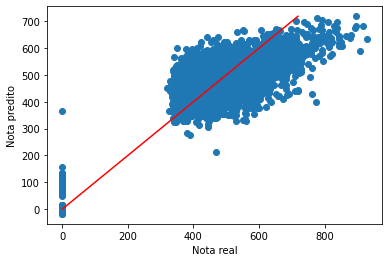

In [26]:
#grafico para confrontar os valores reais e previstos
plt.scatter(y_test, prediction)
range = [y_test.min(),prediction.max()]
plt.plot(range, range, 'red')
plt.xlabel('Nota real')
plt.ylabel('Nota predito')
plt.show()

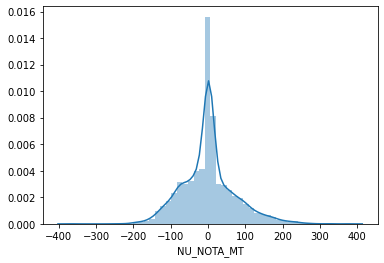

In [27]:
sns.distplot((y_test - prediction))

In [28]:
from sklearn import metrics

In [29]:
print("MAE", metrics.mean_absolute_error(y_test,prediction))

MAE 49.811844085332424


In [30]:
print("MSE", metrics.mean_squared_error(y_test,prediction))

MSE 4988.018872722111


In [31]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

RMSE 70.62590794263895


In [32]:
#nota de mat do arquivo test
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [33]:
fitest = test.set_index('NU_INSCRICAO')
ftest = fitest[x.columns].fillna(0)
ftest

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,,,,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,22,3,1,1,464.8,443.5,431.8,0,120.0,80.0,80.0,100.0,40.0,420.0
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,26,3,1,1,391.1,491.1,548.0,1,120.0,120.0,120.0,120.0,100.0,580.0
b38a03232f43b11c9d0788abaf060f7366053b6d,23,21,1,2,2,595.9,622.7,613.6,0,80.0,40.0,40.0,80.0,80.0,320.0
70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,27,3,1,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
715494628a50142ce8cb17191cfe6d0f3cae0934,41,18,1,2,2,592.9,492.6,571.4,1,100.0,80.0,60.0,80.0,0.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,17,1,2,2,398.3,558.2,511.6,0,120.0,120.0,120.0,100.0,40.0,500.0
a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,17,2,2,2,427.6,579.7,471.1,1,100.0,100.0,100.0,120.0,100.0,520.0
655fa6306720ff16e825903b5422a46608a77545,35,19,1,1,1,639.2,643.8,604.9,0,160.0,140.0,120.0,140.0,80.0,640.0


In [34]:
ftest.dtypes

CO_UF_RESIDENCIA      int64
NU_IDADE              int64
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ESCOLA             int64
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
TP_LINGUA             int64
NU_NOTA_COMP1       float64
NU_NOTA_COMP2       float64
NU_NOTA_COMP3       float64
NU_NOTA_COMP4       float64
NU_NOTA_COMP5       float64
NU_NOTA_REDACAO     float64
dtype: object

In [35]:
prediction = lm.predict(ftest)

In [36]:
prediction.shape

(4576,)

In [37]:
ftest['NU_NOTA_MT'] = prediction

In [38]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [39]:
#salvando em um arquivo
resp = ftest['NU_NOTA_MT']
resp.head()

NU_INSCRICAO
73ff9fcc02f0a99919906c942c2e1a1042cdcf98    425.555553
71a95f9f1b91a82c65ad94abbdf9f54e6066f968    474.621649
b38a03232f43b11c9d0788abaf060f7366053b6d    571.316141
70b682d9a3636be23f6120fa9d6b164eb3c6002d     -2.946823
715494628a50142ce8cb17191cfe6d0f3cae0934    550.340316
Name: NU_NOTA_MT, dtype: float64

In [40]:
with open('answer.csv','w',newline='\n') as f:
    f.write(resp.to_csv(line_terminator=None))